In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, LocalOutlierFactor

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
nfl_df = pd.read_csv('nfl_pts_and_vegas_2014-2023.csv')
print(nfl_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        5214 non-null   int64  
 1   Week          5214 non-null   int64  
 2   Team          5214 non-null   object 
 3   Day           5214 non-null   object 
 4   Date          5214 non-null   object 
 5   Win           5214 non-null   int64  
 6   OT            5214 non-null   int64  
 7   Home          5214 non-null   int64  
 8   Opp           5214 non-null   object 
 9   Off_Pts       5214 non-null   int64  
 10  Def_Pts       5214 non-null   int64  
 11  G             5214 non-null   int64  
 12  Spread        5214 non-null   float64
 13  Total         5214 non-null   float64
 14  Actual_Total  5214 non-null   int64  
 15  Div_Game      5214 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 651.9+ KB
None


In [3]:
nfl_df['Over'] = np.where(nfl_df['Actual_Total'] > nfl_df['Total'], 1, 0)
nfl_df['Under'] = np.where(nfl_df['Actual_Total'] < nfl_df['Total'], 1, 0)
nfl_df['Push'] = np.where(nfl_df['Actual_Total'] == nfl_df['Total'], 1, 0)
print(nfl_df)

      Season  Week Team  Day    Date  Win  OT  Home  Opp  Off_Pts  Def_Pts  \
0       2014     1  CRD  Mon   8-Sep    1   0     1  SDG       18       17   
1       2014     2  CRD  Sun  14-Sep    1   0     0  NYG       25       14   
2       2014     3  CRD  Sun  21-Sep    1   0     1  SFO       23       14   
3       2014     5  CRD  Sun   5-Oct    0   0     0  DEN       20       41   
4       2014     6  CRD  Sun  12-Oct    1   0     1  WAS       30       20   
...      ...   ...  ...  ...     ...  ...  ..   ...  ...      ...      ...   
5209    2023    13  WAS  Sun   3-Dec    0   0     1  MIA       15       45   
5210    2023    15  WAS  Sun  17-Dec    0   0     0  RAM       20       28   
5211    2023    16  WAS  Sun  24-Dec    0   0     0  NYJ       28       30   
5212    2023    17  WAS  Sun  31-Dec    0   0     1  SFO       10       27   
5213    2023    18  WAS  Sun   7-Jan    0   0     1  DAL       10       38   

       G  Spread  Total  Actual_Total  Div_Game  Over  Under  P

In [4]:
nfl_df = nfl_df.sort_values(by=['Season', 'Week']). reset_index(drop=True)
print(nfl_df)

      Season  Week Team  Day   Date  Win  OT  Home  Opp  Off_Pts  Def_Pts   G  \
0       2014     1  CRD  Mon  8-Sep    1   0     1  SDG       18       17   1   
1       2014     1  ATL  Sun  7-Sep    1   1     1  NOR       37       34   1   
2       2014     1  RAV  Sun  7-Sep    0   0     1  CIN       16       23   1   
3       2014     1  BUF  Sun  7-Sep    1   1     0  CHI       23       20   1   
4       2014     1  CAR  Sun  7-Sep    1   0     0  TAM       20       14   1   
...      ...   ...  ...  ...    ...  ...  ..   ...  ...      ...      ...  ..   
5209    2023    18  SFO  Sun  7-Jan    0   0     1  RAM       20       21  17   
5210    2023    18  SEA  Sun  7-Jan    1   0     0  CRD       21       20  17   
5211    2023    18  TAM  Sun  7-Jan    1   0     0  CAR        9        0  17   
5212    2023    18  OTI  Sun  7-Jan    1   0     1  JAX       28       20  17   
5213    2023    18  WAS  Sun  7-Jan    0   0     1  DAL       10       38  17   

      Spread  Total  Actual


Results for 2021:
 Week  1: MAE=0.17
 Week  2: MAE=0.18
 Week  3: MAE=0.26
 Week  4: MAE=0.20
 Week  5: MAE=0.28
 Week  6: MAE=0.15
 Week  7: MAE=0.35
 Week  8: MAE=0.35
 Week  9: MAE=0.20
 Week 10: MAE=0.20
 Week 11: MAE=0.19
 Week 12: MAE=0.18
 Week 13: MAE=0.24
 Week 14: MAE=0.23
 Week 15: MAE=0.21
 Week 16: MAE=0.19
 Week 17: MAE=0.21
 Week 18: MAE=0.34
Season 2021: Total Mean Absolute Error=0.23
Total Mean Squared Error=0.11



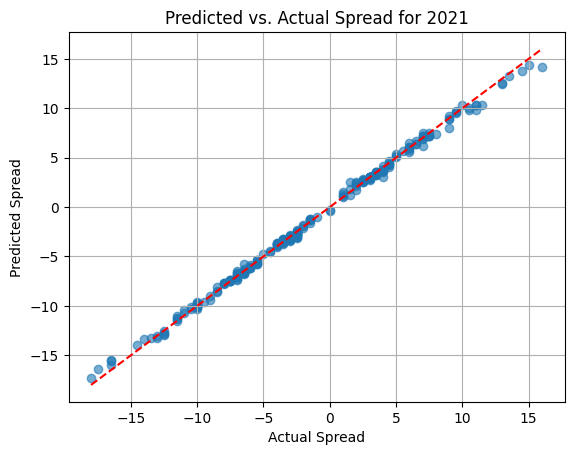


Results for 2022:
 Week  1: MAE=0.12
 Week  2: MAE=0.15
 Week  3: MAE=0.22
 Week  4: MAE=0.05
 Week  5: MAE=0.19
 Week  6: MAE=0.15
 Week  7: MAE=0.28
 Week  8: MAE=0.13
 Week  9: MAE=0.16
 Week 10: MAE=0.17
 Week 11: MAE=0.14
 Week 12: MAE=0.19
 Week 13: MAE=0.15
 Week 14: MAE=0.29
 Week 15: MAE=0.19
 Week 16: MAE=0.27
 Week 17: MAE=0.20
 Week 18: MAE=0.21
Season 2022: Total Mean Absolute Error=0.18
Total Mean Squared Error=0.09



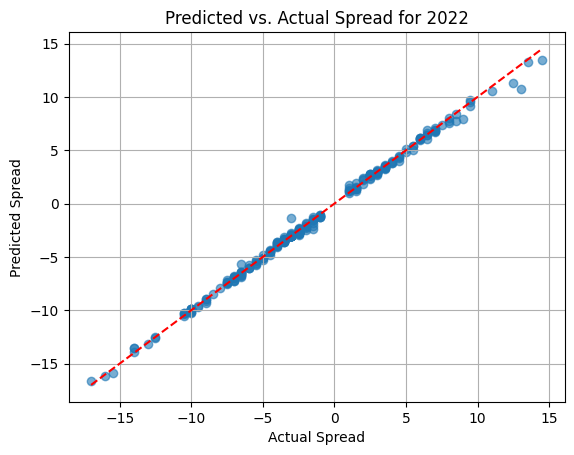


Results for 2023:
 Week  1: MAE=0.12
 Week  2: MAE=0.24
 Week  3: MAE=0.18
 Week  4: MAE=0.09
 Week  5: MAE=0.19
 Week  6: MAE=0.22
 Week  7: MAE=0.11
 Week  8: MAE=0.20
 Week  9: MAE=0.16
 Week 10: MAE=0.35
 Week 11: MAE=0.19
 Week 12: MAE=0.26
 Week 13: MAE=0.17
 Week 14: MAE=0.33
 Week 15: MAE=0.19
 Week 16: MAE=0.20
 Week 17: MAE=0.23
 Week 18: MAE=0.19
Season 2023: Total Mean Absolute Error=0.20
Total Mean Squared Error=0.11



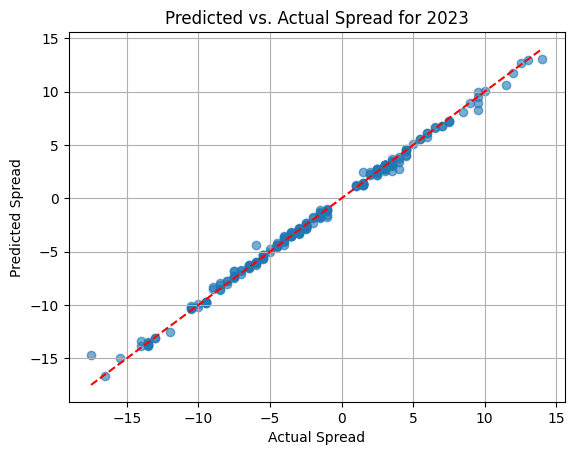

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = nfl_df.query('Home == 1').reset_index(drop=True)

# Set the features and target variable
features = ['Spread','Total']
target = 'Spread'

# Iterate over the seasons
for season in [2021, 2022, 2023]:
    print(f'\nResults for {season}:')

    # Lists to hold predictions and true values for each season
    y_preds = []
    y_trues = []

    # Iterate over the weeks in the season
    for week in range(1, 19):
        print(f' Week {week:>2}:', end=' ')

        # Split data into training and test sets
        train_df = df.query('Season < @season or (Season == @season and Week < @week)')
        test_df = df.query('Season == @season and Week == @week and Actual_Total != Total')

        X_train = train_df[features]
        y_train = train_df[target]
        X_test = test_df[features]
        y_test = test_df[target]

        # Pipeline with scaling and KNeighborsRegressor
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', KNeighborsRegressor(n_neighbors=7))
        ])

        # Fit the regression model
        pipe.fit(X_train, y_train)

        # Predict the Spread values
        y_pred = pipe.predict(X_test)

        # Save true and predicted values for evaluation
        y_preds += list(y_pred)
        y_trues += list(y_test)

        # Print evaluation metrics for each week
        print(f'MAE={mean_absolute_error(y_test, y_pred):.2f}')

    # Season summary metrics
    print(f'Season {season}: Total Mean Absolute Error={mean_absolute_error(y_trues, y_preds):.2f}')
    print(f'Total Mean Squared Error={mean_squared_error(y_trues, y_preds):.2f}\n')

    # Plot predicted vs. actual spreads
    plt.scatter(y_trues, y_preds, alpha=0.6)
    plt.xlabel('Actual Spread')
    plt.ylabel('Predicted Spread')
    plt.title(f'Predicted vs. Actual Spread for {season}')
    plt.plot([min(y_trues), max(y_trues)], [min(y_trues), max(y_trues)], 'r--')
    plt.grid(True)
    plt.show()

MODEL PREDICTIONS FOR WEEK 11 OF THE 2024 NFL SEASON

                         Game  Spread  Total  Predicted Spread
0   Washington @ Philadelphia    -4.0   45.5         -3.785714
1         Green Bay @ Chicago     5.5   40.0          5.500000
2      Jacksonville @ Detroit   -14.0   46.5        -13.857143
3       Minnesota @ Tennessee     6.0   39.5          5.928571
4           Las Vegas @ Miami    -7.5   44.0         -7.428571
5       LA Rams @ New England     4.5   43.5          4.571429
6     Cleveland @ New Orleans    -0.5   44.5         -0.714286
7      Baltimore @ Pittsburgh     3.0   48.0          3.071429
8      Indianapolis @ NY Jets    -4.0   44.0         -3.857143
9            Atlanta @ Denver    -2.5   44.0         -2.500000
10    Seattle @ San Francisco    -6.5   48.0         -6.500000
11      Kansas City @ Buffalo    -2.5   46.0         -2.428571
12   Cincinnati @ LA Chargers    -1.5   47.5         -1.285714
13           Houston @ Dallas     7.5   42.0          7.285714


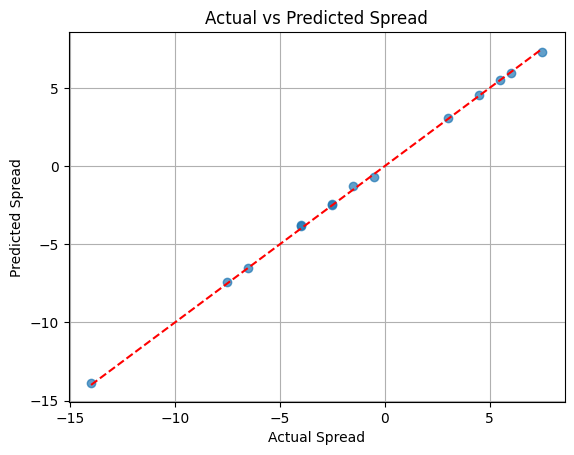

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming nfl_df is pre-loaded with necessary data
df = nfl_df.query('Home == 1').reset_index(drop=True)

# Define features and target
features = ['Spread','Total']
target = 'Spread'

# Define the season and week
season = 2024
week = 11

# Split the data into training sets
train_df = df.query('Season < @season or (Season == @season and Week < @week)')
X_train = train_df[features]
y_train = train_df[target]

# Define games for week 1
week1 = [
    ['Ravens @ Chiefs', -3.0, 46.5],
    ['Packers @ Eagles', -2.5, 49.0],
    ['Cardinals @ Bills', -5.5, 48.0],
    ['Panthers @ Saints', -4.0, 40.0],
    ['Texans @ Colts', +2.5, 49.0],
    ['Steelers @ Falcons', -3.0, 41.0],
    ['Titans @ Bears', -4.0, 44.5],
    ['Patriots @ Bengals', -9.0, 40.5],
    ['Cowboys @ Browns', -2.5, 43.0],
    ['Rams @ Lions', -3.5, 51.0],
    ['Jaguars @ Dolphins', -3.5, 49.0],
    ['Vikings @ Giants', +1.0, 41.0],
    ['Raiders @ Chargers', -3.5, 42.5],
    ['Broncos @ Seahawks', -5.0, 42.0],
    ['Commanders @ Buccaneers', -3.0, 42.5],
    ['Jets @ 49ers', -3.5, 44.0]
]

week2 = [
    ['Bills @ Dolphins', -2.5, 50.5],
    ['Chargers @ Panthers', +5.0, 42.5],
    ['Rams @ Cardinals', -1.0, 47.5],
    ['Saints @ Cowboys', -6.0, 44.5],
    ['Colts @ Packers', +2.5, 47.5],
    ['Steelers @ Broncos', +2.5, 41.0],
    ['Giants @ Commanders', -1.5, 43.0],
    ['Browns @ Jaguars', -3.0, 44.0],
    ['Bengals @ Chiefs', -6.0, 48.0],
    ['49ers @ Vikings', +5.0, 47.0],
    ['Seahawks @ Patriots', +3.5, 41.5],
    ['Jets @ Titans', +3.5, 44.5],
    ['Bucanners @ Lions', -7.5, 49.0],
    ['Raiders @ Ravens', -8.5, 44.0],
    ['Bears @ Texans', -6.5, 46.5],
    ['Falcons @ Eagles', -5.5, 47.5]
]

week3 = [
    ['Patriots @ Jets', -6.5, 42.0],
    ['Giants @ Browns', -6.5, 42.5],
    ['Bears @ Colts', -1.5, 46.5],
    ['Texans @ Vikings', +1.5, 46.5],
    ['Eagles @ Saints', -2.5, 45.0],
    ['Chargers @ Steelers', -2.5, 42.5],
    ['Broncos @ Buccaneers', -6.0, 42.5],
    ['Packers @ Titans', -3.0, 44.0],
    ['Panthers @ Raiders', -6.0, 42.0],
    ['Dolphins @ Seahawks', -4.5, 48.5],
    ['Lions @ Cardinals', +3.0, 50.0],
    ['Ravens @ Cowboys', +1.0, 48.0],
    ['49ers @ Rams', +6.5, 46.5],
    ['Chiefs @ Falcons', +3.0, 49.0],
    ['Jaguars @ Bills', -5.0, 48.5],
    ['Commanders @ Bengals', -7.5, 47.5]
]

week4 = [
    ['Cowboys @ Giants', +5.5, 44.5],
    ['Patriots @ 49ers', -10.5, 43.5],
    ['Bengals @ Panthers', +4.5, 45.5],
    ['Saints @ Falcons', -3.0, 44.5],
    ['Rams @ Bears', -3.0, 47.0],
    ['Vikings @ Packers', -3.0, 45.0],
    ['Eagles @ Buccaneers', +1.0, 47.0],
    ['Jaguars @ Texans', -5.5, 47.0],
    ['Steelers @ Colts', +2.0, 44.5],
    ['Broncos @ Jets', -8.0, 42.5],
    ['Commanders @ Cardinals', -3.5, 45.0],
    ['Browns @ Raiders', +2.5, 43.5],
    ['Chiefs @ Chargers', +7.5, 46.0],
    ['Bills @ Ravens', -2.5, 46.5],
    ['Titans @ Dolphins', -2.5, 46.0],
    ['Seahawks @ Lions', -3.5, 49.0]
]

week5 = [
    ['Buccaneers @ Falcons', -2.5, 44.5],
    ['Jets @ Vikings', -2.5, 42.5],
    ['Ravens @ Bengals', +2.5, 46.5],
    ['Dolphins @ Patriots', +1.0, 45],
    ['Panthers @ Bears', -4.0, 42.0],
    ['Bills @ Texans', -1.0, 47.5],
    ['Colts @ Jaguars', -3.0, 47.0],
    ['Browns @ Commanders', -3.5, 43.5],
    ['Raiders @ Broncos', -3.0, 41.0],
    ['Cardinals @ Niners', -7.0, 47.0],
    ['Packers @ Rams', +3.0, 48.0],
    ['Giants @ Seahawks', -7.0, 43.0],
    ['Cowboys @ Steelers', -2.5, 43.0],
    ['Saints @ Cheifs', -5.5, 43.5],
]

week6 = [
    ['Niners @ Seahawks', +3.5, 46.5],
    ['Jaguars @ Bears', -1.5, 44.5],
    ['Cardinals @ Packers', -5.0, 47.0],
    ['Texans @ Patriots', +7.0, 38.0],
    ['Commanders @ Ravens', -6.5, 51.5],
    ['Buccaneers @ Saints', +3.5, 41.5],
    ['Browns @ Eagles', -9.5, 42.5],
    ['Colts @ Titans', -2.5, 43.0],
    ['Chargers @ Broncos', +3.0, 36.0],
    ['Steelers @ Raiders', +3.0, 36.5],
    ['Falcons @ Panthers', +6.0, 47.0],
    ['Lions @ Cowboys', +3.0, 52.0],
    ['Bengals @ Giants', +3.5, 47.5],
    ['Bills @ Jets', +2.5, 41.0],
]

week7 = [
    ['Broncos @ Saints', +3.0, 41.5],  
    ['Patriots @ Jaguars', -6.0, 40.5], 
    ['Seahawks @ Falcons', -3.0, 47.0],
    ['Titans @ Bills', -9.5, 46.5],
    ['Bengals @ Browns', +5.5, 46.0],
    ['Texans @ Packers', -3.0, 48.5],
    ['Dolphins @ Colts', -3.0, 49.0],
    ['Lions @ Vikings', -1.5, 48.0],
    ['Eagles @ Giants', +3.5, 44.0],
    ['Raiders @ Rams', -7.0, 45.5],
    ['Panthers @ Commanders', -9.5, 41.0],
    ['Chiefs @ 49ers', -1.5, 47.5],
    ['Jets @ Steelers', +1.5, 43.0], 
    ['Ravens @ Buccaneers', +3.5, 44.5],
    ['Chargers @ Cardinals', +1.5, 47.0]  
]

week8 = [
    ['Vikings @ Rams', +2.5, 45.5],
    ['Ravens @ Browns', +8.5, 45.0],
    ['Colts @ Texans', -5.0, 47.5],
    ['Packers @ Jaguars', +3.5, 45.0],
    ['Cardinals @ Dolphins', -4.0, 48.5],
    ['Jets @ Patriots', +7.0, 40.5],
    ['Falcons @ Buccaneers', +2.5, 42.5],
    ['Eagles @ Bengals', -2.5, 47.5],
    ['Saints @ Chargers', -7.0, 42.5],
    ['Bills @ Seahawks', +3.0, 46.5],
    ['Panthers @ Broncos', -11.0, 40.5],
    ['Chiefs @ Raiders', +8.5, 46.0],
    ['Cowboys @ 49ers', -5.5, 46.5],
    ['Bears @ Commanders', -1.0, 44.5],  
    ['Titans @ Lions', -11.5, 47.5],     
    ['Giants @ Steelers', -6.0, 41.5]    
]

week9 = [
    ['Texans @ Jets', -2.5, 45.0],
    ['Cowboys @ Falcons', -3.0, 46.0],
    ['Dolphins @ Bills', -6.0, 47.5],
    ['Raiders @ Bengals', -7.0, 44.0],
    ['Chargers @ Browns', +1.5, 43.5],
    ['Patriots @ Titans', -3.5, 45.0],
    ['Commanders @ Giants', +4.0, 42.0],
    ['Saints @ Panthers', +7.0, 43.0],
    ['Broncos @ Ravens', -8.0, 41.0],
    ['Jaguars @ Eagles', -7.5, 47.0],
    ['Bears @ Cardinals', -1.5, 42.5],
    ['Lions @ Packers', +2.5, 44.5],
    ['Rams @ Seahawks', +1.5, 46.0],
    ['Colts @ Vikings', -5.5, 45.0],
    ['Buccaneers @ Chiefs', -8.5, 49.0]
]

week10 = [
    ['Bengals @ Ravens', -6.0, 46.0],
    ['Giants @ Panthers', +6.5, 40.5],
    ['Patriots @ Bears', -6.0, 42.0],
    ['Bills @ Colts', +4.0, 46.5],
    ['Broncos @ Chiefs', -7.5, 44.5],
    ['Falcons @ Saints', +3.5, 44.5],
    ['49ers @ Buccaneers', +6.5, 46.5],
    ['Steelers @ Commanders', -3.0, 43.5],
    ['Vikings @ Jaguars', +7.0, 44.5],
    ['Titans @ Chargers', -7.5, 42.5],
    ['Eagles @ Cowboys', +7.5, 48.0],
    ['Jets @ Cardinals', +1.5, 45.5],
    ['Lions @ Texans', +3.5, 50.0],
    ['Dolphins @ Rams', -1.5, 46.0]
]

week11 = [
    ['Washington @ Philadelphia', -4.0, 45.5],
    ['Green Bay @ Chicago', +5.5, 40.0],
    ['Jacksonville @ Detroit', -14.0, 46.5],
    ['Minnesota @ Tennessee', +6.0, 39.5],
    ['Las Vegas @ Miami', -7.5, 44.0],
    ['LA Rams @ New England', +4.5, 43.5],
    ['Cleveland @ New Orleans', -0.5, 44.5],
    ['Baltimore @ Pittsburgh', +3.0, 48.0],
    ['Indianapolis @ NY Jets', -4.0, 44.0],
    ['Atlanta @ Denver', -2.5, 44.0],
    ['Seattle @ San Francisco', -6.5, 48.0],
    ['Kansas City @ Buffalo', -2.5, 46.0],
    ['Cincinnati @ LA Chargers', -1.5, 47.5],
    ['Houston @ Dallas', +7.5, 42.0]
]


# Create a DataFrame for the new week's games
X_new = pd.DataFrame(week11, columns=['Game', 'Spread', 'Total'])

# Create a pipeline with StandardScaler and KNeighborsRegressor
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=7))
])

# Fit the regression model
clf = pipe.fit(X_train, y_train)

# Outlier detection using LocalOutlierFactor
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('lof', LocalOutlierFactor(novelty=True))
])
pipe2.fit(X_train)
y_test_novelty = pipe2.predict(X_new[features])

# Mask to filter out detected outliers
mask = [y == 1 for y in y_test_novelty]
X_new = X_new[mask]

# Predict spreads using the regression model
y_pred = clf.predict(X_new[features])

# Add the predictions to the DataFrame
X_new['Predicted Spread'] = y_pred

# Print the results
print(f'MODEL PREDICTIONS FOR WEEK {week} OF THE {season} NFL SEASON\n')
print(X_new[['Game', 'Spread', 'Total', 'Predicted Spread']])

# Plotting the actual vs predicted spreads
plt.scatter(X_new['Spread'], X_new['Predicted Spread'], alpha=0.7)
plt.xlabel('Actual Spread')
plt.ylabel('Predicted Spread')
plt.title('Actual vs Predicted Spread')
plt.plot([min(X_new['Spread']), max(X_new['Spread'])], [min(X_new['Spread']), max(X_new['Spread'])], 'r--')
plt.grid(True)
plt.show()


In [9]:
import pickle

# Save the model to a file
with open('spread.pkl', 'wb') as file:
    pickle.dump(clf, file)